

## Objective of this assignment: Use different type of convolution.

**Use a Normal Convolution layer**

**Use a Spatially Separable Convolution layer**

**Use a Depthwise Separable Convolution**

**Use a Grouped Convolution (use 3x3, 5x5 only) layer**

**Use a Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) layer**

**In this assignment  we will try to build our model using functional API at the place of Sequential API. **

###Import Library

In [0]:

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.utils import np_utils
from keras.models import Model

### load the pre-shuffled CIFAR10 data

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 9s 0us/step


### look into some images

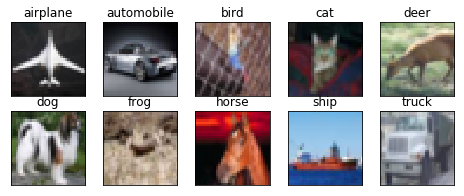

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Function to plot train and test model accuracy and losses with respect epochs

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### Function to give actual test accuracy from model and test data

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

### scale the test and train data

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255


### change labels from 1-dimentional class matrix to 10 dimentional class matrix to predict out of 10 class

In [0]:
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Model using functional API **

In [16]:
input_layer = Input(shape=(32,32,3))

conv1 = Convolution2D(32, 3, 3, border_mode='same', activation='relu')(input_layer)
batchnorm1 = BatchNormalization()(conv1)
dropout1 = Dropout(0.15)(batchnorm1)

conv2_sp_1 = Convolution2D(68, 3, 1, border_mode='same', activation='relu')(dropout1)
conv2_sp_2 = Convolution2D(68, 1, 3, border_mode='same', activation='relu')(conv2_sp_1)
batchnorm2 = BatchNormalization()(conv2_sp_2)
dropout2 = Dropout(0.15)(batchnorm2)

conv3 = SeparableConv2D(136, 3, 3, border_mode='same', activation='relu')(dropout2)
batchnorm3 = BatchNormalization()(conv3)
dropout3 = Dropout(0.15)(batchnorm3)


conv4 = Convolution2D(32, 1, 1, activation='relu')(dropout3)
batchnorm4 = BatchNormalization()(conv4)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)

conv5_1 = Convolution2D(68, 3, 3, border_mode='same', activation='relu')(maxpool1)
batchnorm5_1 = BatchNormalization()(conv5_1)
dropout4_1 = Dropout(0.15)(batchnorm5_1)

conv5_2 = Convolution2D(68, 5, 5, border_mode='same', activation='relu')(maxpool1)
batchnorm5_2 = BatchNormalization()(conv5_2)
dropout4_2 = Dropout(0.15)(batchnorm5_2)

merge1 = concatenate([dropout4_1, dropout4_2])


conv6_1 = Convolution2D(136, 3, 3, border_mode='same', dilation_rate = 1, activation='relu')(merge1)
batchnorm6_1 = BatchNormalization()(conv6_1)
dropout5_1 = Dropout(0.15)(batchnorm6_1)

conv6_2 = Convolution2D(136, 3, 3, border_mode='same', dilation_rate = 2, activation='relu')(merge1)
batchnorm6_2 = BatchNormalization()(conv6_2)
dropout5_2 = Dropout(0.15)(batchnorm6_2)

merge2 = concatenate([dropout5_1, dropout5_2])


conv7 = Convolution2D(32, 1, 1, activation='relu')(merge2)
batchnorm7 = BatchNormalization()(conv7)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm7)


conv8 = Convolution2D(68, 3, 3, border_mode='same', activation='relu')(maxpool2)
batchnorm8 = BatchNormalization()(conv8)
dropout6 = Dropout(0.15)(batchnorm8)

conv9 = Convolution2D(136, 3, 3, border_mode='same', activation='relu')(dropout6)
batchnorm9 = BatchNormalization()(conv9)
dropout7 = Dropout(0.15)(batchnorm9)

conv10 = Convolution2D(10, 1, 1, activation='relu')(dropout7)
batchnorm10 = BatchNormalization()(conv10)
conv11 = Convolution2D(10, 8)(batchnorm10)

flat1 = Flatten()(conv11)
output = Activation('softmax')(flat1)
model = Model(inputs=input_layer, outputs=output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(68, (3, 1), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(68, (1, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(136, (3, 3), activation="relu", padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1)

### model summary

In [17]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 32, 32, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_21 (BatchNo (None, 32, 32, 32)   128         conv2d_23[0][0]                  
__________________________________________________________________________________________________
dropout_17 (Dropout)            (None, 32, 32, 32)   0           batch_normalization_21[0][0]     
__________________________________________________________________________________________________
conv2d_24 

###  run model for 50 epochs

In [18]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

W0803 07:32:00.152070 139931578402688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_s

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
195/195 [==============================] - 37s 191ms/step - loss: 0.0520 - acc: 0.9818 - val_loss: 0.6348 - val_acc: 0.8651

Epoch 00001: val_acc improved from -inf to 0.86510, saving model to saved_model.hdf5
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
195/195 [==============================] - 36s 184ms/step - loss: 0.0360 - acc: 0.9879 - val_loss: 0.6455 - val_acc: 0.8623

Epoch 00002: val_acc did not improve from 0.86510
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
195/195 [==============================] - 36s 186ms/step - loss: 0.0283 - acc: 0.9904 - val_loss: 0.6695 - val_acc: 0.8620

Epoch 00003: val_acc did not improve from 0.86510
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
195/195 [==============================] - 37s 189ms/step - loss: 0.0252 - acc: 0.9914 - val_loss: 0.65

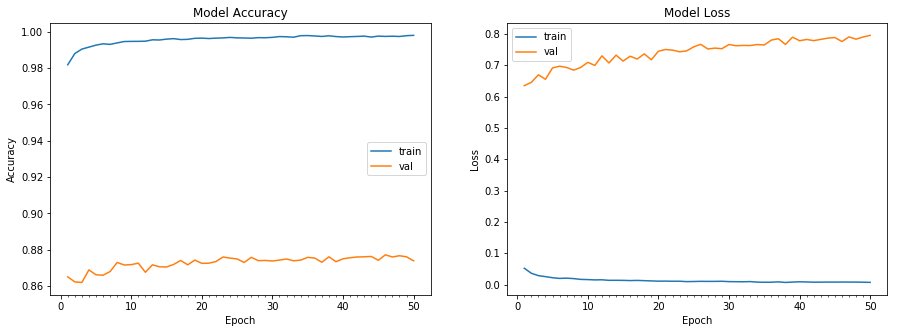

In [22]:
# checkpoint
filepath="saved_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

from keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False,
                             featurewise_center=True, featurewise_std_normalization=True)

datagen_test = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
iterator_test = datagen_test.flow(test_features, test_labels, batch_size=len(test_features), shuffle=False)
test_features_2, test_labels_2 = iterator_test.next()

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen_train.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features_2, test_labels_2), verbose=1,
                                 callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)


In [23]:
# compute test accuracy
model.load_weights('saved_model.hdf5')
print ("Best Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Best Accuracy on test data is: 87.72
